In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import Perceptron

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D  # Conv2D extracts features
from tensorflow.keras.layers import MaxPooling2D # MaxPooling2D reduces size
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout # Dropout prevents overfitting
from tensorflow.keras.utils import to_categorical

In [7]:
df = pd.read_csv('MNIST_train.csv')
test = pd.read_csv('MNIST_test.csv')

In [8]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7503,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12336,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32048,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18544,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29717,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(42000, 785)

In [10]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [11]:
test.sample(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8242,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6178,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5813,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7078,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.shape

(10000, 785)

In [13]:
X_train = df.drop('label', axis=1).values
y_train = df['label'].values

X_test = test.drop('label', axis=1).values
y_test = test['label'].values


In [14]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [15]:
X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)

In [16]:
X_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
y_train_categ = to_categorical(y_train, 10)
y_test_categ = to_categorical(y_test, 10)

In [18]:
print('shape of output labels: ', y_train_categ.shape, '\n')
print(y_train_categ)

shape of output labels:  (42000, 10) 

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


# Perceptron

In [19]:
perceptron = Sequential([
     Flatten(input_shape=(28,28)),
     Dense(10, activation='softmax')
 ])

In [20]:
perceptron.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history_perceptron = perceptron.fit(X_train_img, y_train_categ, batch_size=32, epochs=10, validation_data=(X_test_img, y_test_categ), verbose=1)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7949 - loss: 0.8041 - val_accuracy: 0.9111 - val_loss: 0.3225
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9133 - loss: 0.3185 - val_accuracy: 0.9199 - val_loss: 0.2861
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9200 - loss: 0.2900 - val_accuracy: 0.9247 - val_loss: 0.2695
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2728 - val_accuracy: 0.9257 - val_loss: 0.2602
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9278 - loss: 0.2623 - val_accuracy: 0.9258 - val_loss: 0.2560
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9300 - loss: 0.2525 - val_accuracy: 0.9269 - val_loss: 0.2532
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9276 - loss: 0.2552 - val_accuracy: 0.9302 - val_loss: 0.2478
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9320 - loss: 0.2431 - 

In [22]:
perceptron_accuracy = perceptron.evaluate(X_test_img, y_test_categ, verbose=0)[1]
print("accuracy of perceptron is: ", perceptron_accuracy)

accuracy of perceptron is:  0.930400013923645


#**ANN**

In [23]:
ann_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [24]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_ann = ann_model.fit(X_train_img, y_train_categ, batch_size=32, epochs=10, validation_data=(X_test_img, y_test_categ), verbose=1)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8594 - loss: 0.4814 - val_accuracy: 0.9537 - val_loss: 0.1457
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9618 - loss: 0.1260 - val_accuracy: 0.9690 - val_loss: 0.0979
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9745 - loss: 0.0798 - val_accuracy: 0.9779 - val_loss: 0.0732
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9814 - loss: 0.0606 - val_accuracy: 0.9834 - val_loss: 0.0546
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9858 - loss: 0.0443 - val_accuracy: 0.9855 - val_loss: 0.0496
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9892 - loss: 0.0323 - val_accuracy: 0.9873 - val_loss: 0.0448
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.9872 - val_loss: 0.0475
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9910 - loss: 0.0266 

In [25]:
ann_accuracy = ann_model.evaluate(X_test_img, y_test_categ, verbose=0)[1]
print("accuracy of ann is: ", ann_accuracy)

accuracy of ann is:  0.98580002784729


# **CNN**

In [26]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [27]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train_cnn, y_train_categ, batch_size=32, epochs=10, validation_data=(X_test_cnn, y_test_categ), verbose=1)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.8306 - loss: 0.5229 - val_accuracy: 0.9827 - val_loss: 0.0510
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9688 - loss: 0.1006 - val_accuracy: 0.9883 - val_loss: 0.0363
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9792 - loss: 0.0663 - val_accuracy: 0.9884 - val_loss: 0.0322
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accuracy: 0.9925 - val_loss: 0.0225
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9933 - val_loss: 0.0183
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9946 - val_loss: 0.0162
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - accuracy: 0.9905 - loss: 0.0299 - val_accuracy: 0.9946 - val_loss: 0.0160
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9916 -

In [29]:
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_categ, verbose=0)[1]
print("accuracy of cnn is: ", cnn_accuracy)

accuracy of cnn is:  0.9969000220298767


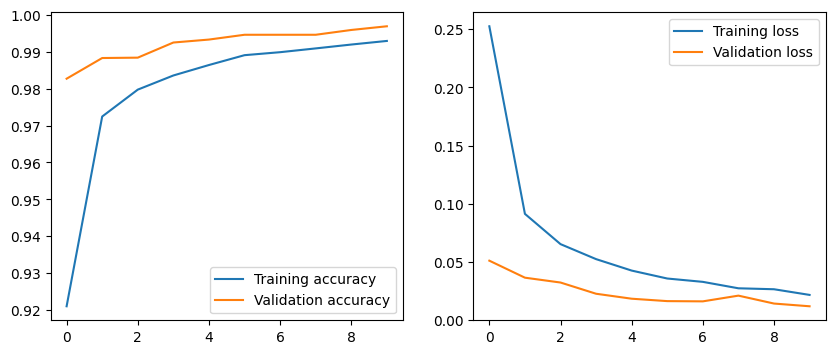

In [49]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Training loss')
plt.plot(history_cnn.history['val_loss'], label='Validation loss')
plt.legend()

plt.show()

In [51]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


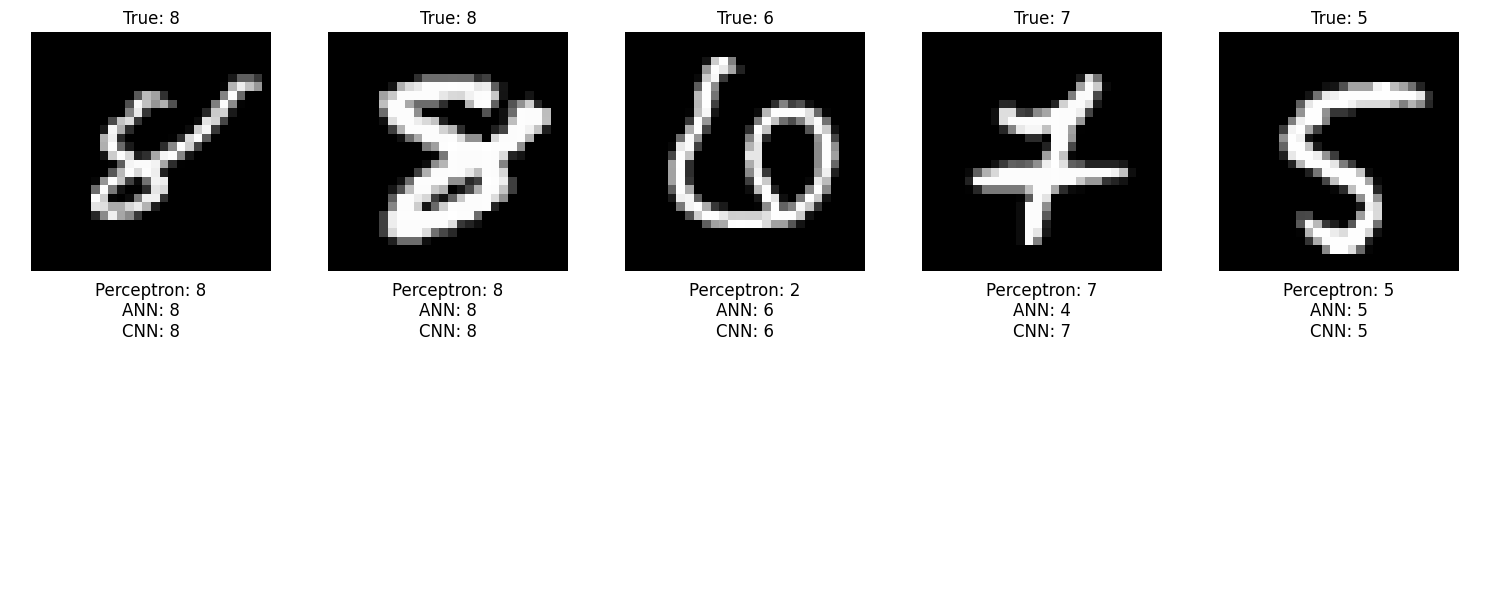

In [58]:
show_side_by_side([perceptron, ann_model, cnn_model], ["Perceptron", "ANN", "CNN"], X_test, X_test_cnn, y_test)